In [3]:
from sklearn.decomposition import PCA, FastICA, KernelPCA, randomized_svd
from utility3 import load_data, decomp_exp, cluster_plots1
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
import matplotlib.colors
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
import time
import os
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score, adjusted_rand_score
import matplotlib.colors as colors
from sklearn.metrics import mutual_info_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from utility3 import load_data, plot_lines, run_exp, cluster_plots1, decomp_exp
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict

color_list = ['red', 'darkorange', 'gold', 'lawngreen', 'darkgreen', 'blue', 'purple', 'indigo']
mycmap = colors.ListedColormap(color_list)
boundaries = range(8)#[0.5*2*i for i in range(8)]

In [4]:
X_train_m, X_val_m, X_test_m, y_train_m, y_val_m, y_test_m, class_names_m = load_data('motions', scale=True, valset=True)
X_train_p, X_val_p, X_test_p, y_train_p, y_val_p, y_test_p, class_names_p = load_data('particles', scale=True, valset=True)

motions shapes: (11678, 64), (11678, 1)
particles shapes: (15233, 7), (15233, 1)


In [5]:
#pca motions: 23, particles:2

pca_m_data = np.load('pca_m_data.npy')
pca_p_data = np.load('pca_p_data.npy')

pca2_m_data = np.load('pca2_m_data.npy')
pca2_p_data = np.load('pca2_p_data.npy')

ica_m_data = np.load('ica_m_data.npy')
ica_p_data = np.load('ica_p_data.npy')

rca_m_data = np.load('rca_m_data.npy')
rca_p_data = np.load('rca_p_data.npy')

#tsne_m_data = np.load('tsne_m_data.npy')
#tsne_p_data = np.load('tsne_p_data.npy')

[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca_p, X_val_pca_p, pca_p] = pca_p_data

[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_pca2_p, X_val_pca2_p, pca2_p] = pca2_p_data

[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_ica_p, X_val_ica_p, ica_p] = ica_p_data

[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
[X_rca_p, X_val_rca_p, rca_p] = rca_p_data

In [11]:
ica_m_tsne_X = np.load('ica_m_tsne_X.npy')
X_tsne_p = np.load('X_tsne_p_set.npy')[3]

In [15]:
#PCA - K-Means

km_m = KMeans()
km_p = KMeans()

# fitting
pca_fit_m = km_m.fit_transform(X_pca_m)
pca_fit_p = km_p.fit_transform(X_pca_p)
# predictions
pca_y_m = km_m.predict(X_pca_m)
pca_y_val_m = km_m.predict(X_val_pca_m)

pca_y_p = km_p.predict(X_pca_p)

# fitting
pca2_fit_m = km_m.fit_transform(X_pca2_m)
pca2_fit_p = km_p.fit_transform(X_pca2_p)
# predictions
pca2_y_m = km_m.predict(X_pca2_m)
pca2_y_val_m = km_m.predict(X_val_pca2_m)

pca2_y_p = km_p.predict(X_pca2_p)

# fitting
ica_fit_m = km_m.fit_transform(X_ica_m)
ica_fit_p = km_p.fit_transform(X_ica_p)
# predictions
ica_y_m = km_m.predict(X_ica_m)
ica_y_val_m = km_m.predict(X_val_ica_m)

ica_y_p = km_p.predict(X_ica_p)

#fitting
rca_fit_m = km_m.fit_transform(X_rca_m)
rca_fit_p = km_p.fit_transform(X_rca_p)
# predictions
rca_y_m = km_m.predict(X_rca_m)
rca_y_val_m = km_m.predict(X_val_rca_m)

rca_y_p = km_p.predict(X_rca_p)

#fitting
tsne_fit_m = km_m.fit_transform(ica_m_tsne_X)
tsne_fit_p = km_p.fit_transform(X_tsne_p)
# predictions
tsne_y_m = km_m.predict(ica_m_tsne_X)
tsne_y_val_m = km_m.predict(ica_m_tsne_X)

tsne_y_p = km_p.predict(X_tsne_p)

# fitting base model for comparison
base_fit_m = km_m.fit_transform(X_train_m)
base_fit_p = km_p.fit_transform(X_train_p)
# predictions
base_y_m = km_m.predict(X_train_m)
base_y_val_m = km_m.predict(X_val_m)

base_y_p = km_p.predict(X_train_p)

In [17]:
#export y_val's'
y_vals = [pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m]
np.save('y_vals', y_vals)

In [17]:
motions_export = [pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m]
np.save('motions_kmeans', motions_export)

In [80]:
def buildreport(y_train, y_pred, adjust=1):
    return [adjusted_rand_score(y_train, y_pred)*adjust, v_measure_score(y_train, y_pred)*adjust, completeness_score(y_train, y_pred)*adjust, homogeneity_score(y_train, y_pred)*adjust]

In [263]:
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
base_km_m = buildreport(y_train_m, base_y_m, adjust=1)
base_km_p = buildreport(y_train_p, base_y_p, adjust=1)

pca_km_m = buildreport(y_train_m, pca_y_m, adjust=1)
pca_km_p = buildreport(y_train_p, pca_y_p, adjust=1)

pca2_km_m = buildreport(y_train_m, pca2_y_m, adjust=1)
pca2_km_p = buildreport(y_train_p, pca2_y_p, adjust=1)

ica_km_m = buildreport(y_train_m, ica_y_m, adjust=1)
ica_km_p = buildreport(y_train_p, ica_y_p, adjust=1)

rca_km_m = buildreport(y_train_m, rca_y_m, adjust=1)
rca_km_p = buildreport(y_train_p, rca_y_p, adjust=1)

tsne_km_m = buildreport(y_train_m, tsne_y_m, adjust=1)
tsne_km_p = buildreport(y_train_p, tsne_y_p, adjust=1)

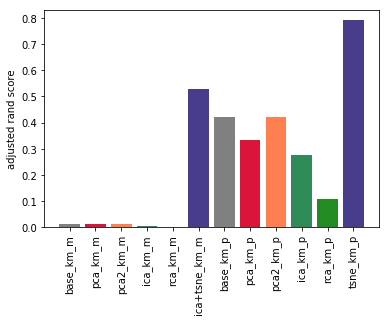

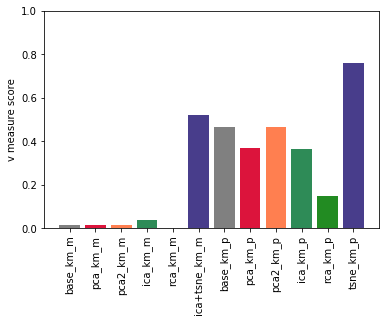

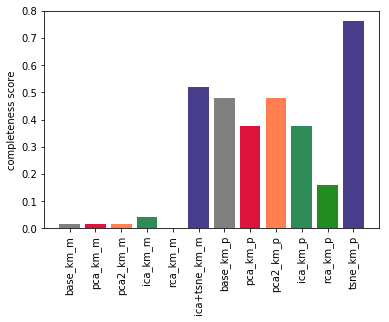

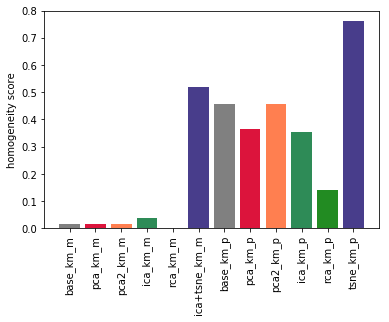

In [265]:
all = [base_km_m, pca_km_m, pca2_km_m, ica_km_m, rca_km_m, tsne_km_m, base_km_p, pca_km_p, pca2_km_p, ica_km_p, rca_km_p, tsne_km_p]
names= ['base_km_m', 'pca_km_m', 'pca2_km_m', 'ica_km_m', 'rca_km_m', 'ica+tsne_km_m', 'base_km_p', 'pca_km_p', 'pca2_km_p', 'ica_km_p', 'rca_km_p', 'tsne_km_p']

v_meas = []
adj_rand = []
completeness = []
homogeneity = []
for each in all:
    adj_rand.append(each[0])
    v_meas.append(each[1])
    completeness.append(each[2])
    homogeneity.append(each[3])

color_list=['grey', 'crimson', 'coral', 'seagreen', 'forestgreen', 'darkslateblue'] * 2  #'darkorange', 'rebeccapurple'] * 2

plt.bar(names, adj_rand, color=color_list)
plt.ylabel('adjusted rand score')
plt.xticks(rotation=90)
plt.show()

plt.bar(names, v_meas, color=color_list)
plt.ylabel('v measure score')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

plt.bar(names, completeness, color=color_list)
plt.ylabel('completeness score')
plt.xticks(rotation=90)
plt.show()

plt.bar(names, homogeneity, color=color_list)
plt.ylabel('homogeneity score')
plt.xticks(rotation=90)
plt.show()

In [19]:
#PCA - K-Means

gm_m = GaussianMixture(n_components=4, covariance_type='full')
gm_p = GaussianMixture(n_components=4, covariance_type='tied')

# fitting
pca_fit2_m = gm_m.fit(X_pca_m)
pca_fit2_p = gm_p.fit(X_pca_p)
# predictions
pca_y2_m = pca_fit2_m.predict(X_pca_m)
pca_y2_val_m = pca_fit2_m.predict(X_val_pca_m)

pca_y2_p = pca_fit2_p.predict(X_pca_p)

# fitting
pca2_fit2_m = gm_m.fit(X_pca2_m)
pca2_fit2_p = gm_p.fit(X_pca2_p)
# predictions
pca2_y2_m = pca2_fit2_m.predict(X_pca2_m)
pca2_y2_val_m = pca2_fit2_m.predict(X_val_pca2_m)

pca2_y2_p = pca2_fit2_p.predict(X_pca2_p)

# fitting
ica_fit2_m = gm_m.fit(X_ica_m)
ica_fit2_p = gm_p.fit(X_ica_p)
# predictions
ica_y2_m = ica_fit2_m.predict(X_ica_m)
ica_y2_val_m = ica_fit2_m.predict(X_val_ica_m)

ica_y2_p = ica_fit2_p.predict(X_ica_p)

#fitting
rca_fit2_m = gm_m.fit(X_rca_m)
rca_fit2_p = gm_p.fit(X_rca_p)
# predictions
rca_y2_m = rca_fit2_m.predict(X_rca_m)
rca_y2_val_m = rca_fit2_m.predict(X_val_rca_m)

rca_y2_p = rca_fit2_p.predict(X_rca_p)

#fitting
tsne_fit2_m = gm_m.fit(ica_m_tsne_X)
tsne_fit2_p = gm_p.fit(X_tsne_p)
# predictions
tsne_y2_m = tsne_fit2_m.predict(ica_m_tsne_X)
#tsne_y2_val_m = pca_fit2_m.predict(X_val_pca_m)

tsne_y2_p = tsne_fit2_p.predict(X_tsne_p)

# fitting base model for comparison
base_fit2_m = gm_m.fit(X_train_m)
base_fit2_p = gm_p.fit(X_train_p)
# predictions
base_y2_m = base_fit2_m.predict(X_train_m)
#pca_y2_val_m = pca_fit2_m.predict(X_val_pca_m)

base_y2_p = base_fit2_p.predict(X_train_p)

In [20]:
X_gm = []

motions_val_export = [pca_y2_val_m, pca2_y2_val_m, ica_y2_val_m, rca_y2_val_m]#, tsne_y2_val_m, base_y2_val_m]
np.save('motions_val_em', motions_val_export)

In [272]:
metrics = ['adjusted_rand_score', 'v_measure_score', 'completeness_score', 'homogeneity_score']
base_gm_m = buildreport(y_train_m, base_y2_m, adjust=1)
base_gm_p = buildreport(y_train_p, base_y2_p, adjust=1)

pca_gm_m = buildreport(y_train_m, pca_y2_m, adjust=1)
pca_gm_p = buildreport(y_train_p, pca_y2_p, adjust=1)

pca2_gm_m = buildreport(y_train_m, pca2_y2_m, adjust=1)
pca2_gm_p = buildreport(y_train_p, pca2_y2_p, adjust=1)

ica_gm_m = buildreport(y_train_m, ica_y2_m, adjust=1)
ica_gm_p = buildreport(y_train_p, ica_y2_p, adjust=1)

rca_gm_m = buildreport(y_train_m, rca_y2_m, adjust=1)
rca_gm_p = buildreport(y_train_p, rca_y2_p, adjust=1)

tsne_gm_m = buildreport(y_train_m, tsne_y2_m, adjust=1)
tsne_gm_p = buildreport(y_train_p, tsne_y2_p, adjust=1)

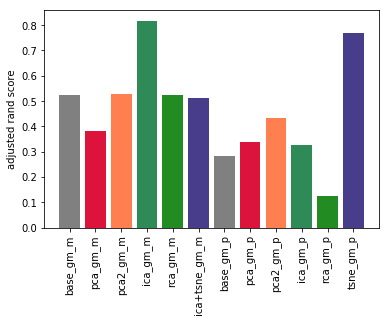

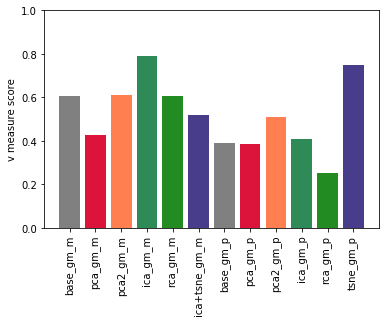

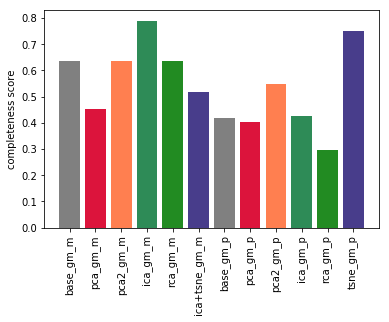

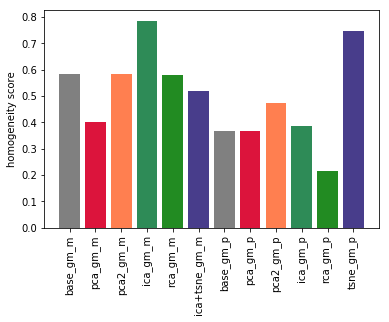

In [274]:
all2 = [base_gm_m, pca_gm_m, pca2_gm_m, ica_gm_m, rca_gm_m, tsne_gm_m, base_gm_p, pca_gm_p, pca2_gm_p, ica_gm_p, rca_gm_p, tsne_gm_p]
names2 = ['base_gm_m', 'pca_gm_m', 'pca2_gm_m', 'ica_gm_m', 'rca_gm_m', 'ica+tsne_gm_m', 'base_gm_p', 'pca_gm_p', 'pca2_gm_p', 'ica_gm_p', 'rca_gm_p', 'tsne_gm_p']

v_meas2 = []
adj_rand2 = []
completeness2 = []
homogeneity2 = []
for each in all2:
    adj_rand2.append(each[0])
    v_meas2.append(each[1])
    completeness2.append(each[2])
    homogeneity2.append(each[3])

#color_list=['grey', 'crimson', 'darkorange', 'rebeccapurple'] * 2 ## Color list defined above

plt.bar(names2, adj_rand2, color=color_list)
plt.ylabel('adjusted rand score')
plt.xticks(rotation=90)
plt.show()

plt.bar(names2, v_meas2, color=color_list)
plt.ylabel('v measure score')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

plt.bar(names2, completeness2, color=color_list)
plt.ylabel('completeness score')
plt.xticks(rotation=90)
plt.show()

plt.bar(names2, homogeneity2, color=color_list)
plt.ylabel('homogeneity score')
plt.xticks(rotation=90)
plt.show()  


In [114]:
tsne_m = TSNE(n_components=2, n_iter=3000)
tsne_p = TSNE(n_components=2, n_iter=3000)
X_tsne_m = tsne_m.fit_transform(X_train_m)
X_tsne_p = tsne_p.fit_transform(X_train_p)

print(X_tsne_m.shape)
print(X_tsne_p.shape)

(7473, 2)
(9748, 2)


In [192]:
X_tsne_m_set2 = []
X_tsne_p_set2 = []
X_tsne_m_set2_kld = []
X_tsne_p_set2_kld = []
X_tsne_m_time = []
X_tsne_p_time = []
X_tsne_model_m = []
X_tsne_model_p = []

param_range = [10, 20, 40, 60, 80, 100, 120, 140]
for i in param_range:
    print("run at perplexity = {}".format(i))
    model_m = TSNE(n_components=2, n_iter=5000, learning_rate=300, metric='cosine', perplexity=i)
    model_p = TSNE(n_components=2, n_iter=5000, learning_rate=1000, metric='canberra', perplexity=i)
    
    t0 = time.time()
    X_tsne_m_set2.append(model_m.fit_transform(X_train_m))
    X_tsne_m_time.append(time.time()-t0)
    
    t0 = time.time()
    X_tsne_p_set2.append(model_p.fit_transform(X_train_p))
    X_tsne_p_time.append(time.time()-t0)
    
    X_tsne_m_set2_kld.append(model_m.kl_divergence_)
    X_tsne_p_set2_kld.append(model_p.kl_divergence_)
    
    X_tsne_model_m.append(model_m)
    X_tsne_model_m.append(model_p)

#X_tsne_m_set.append(X_tsne_m)
#X_tsne_p_set.append(X_tsne_p)


run at perplexity = 10


run at perplexity = 20


run at perplexity = 40


run at perplexity = 60


run at perplexity = 80


run at perplexity = 100


run at perplexity = 120


run at perplexity = 140


array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

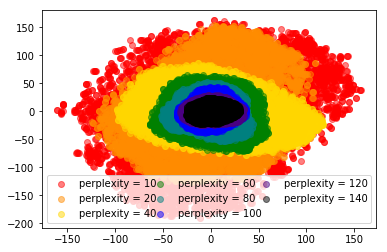

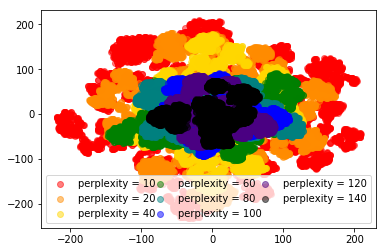

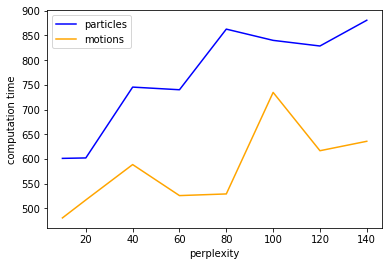

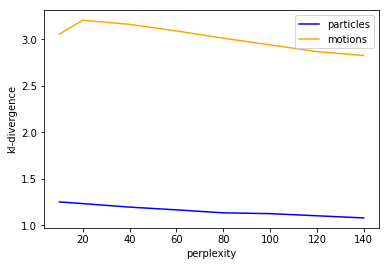

In [223]:
rainbow_list = ['red', 'darkorange', 'gold', 'green', 'teal', 'blue', 'indigo', 'black']

for i in range(len(X_tsne_m_set2)):
    fit = X_tsne_m_set2[i]
    plt.scatter(fit[:, 0], fit[:, 1], color=rainbow_list[i], alpha=0.5, label="perplexity = {}".format(param_range[i]))
plt.legend(loc='lower left', mode='expand', ncol=3)
plt.show()

for i in range(len(X_tsne_p_set2)):
    fit = X_tsne_p_set2[i]
    plt.scatter(fit[:, 0], fit[:, 1], color=rainbow_list[i], alpha=0.5, label="perplexity = {}".format(param_range[i]))
plt.legend(loc='lower left', mode='expand', ncol=3)
plt.show()

plt.plot(param_range, X_tsne_p_time, label="particles", color="blue")
plt.plot(param_range, X_tsne_m_time, label="motions", color="orange")
plt.legend()
plt.xlabel('perplexity')
plt.ylabel('computation time')
plt.show()

plt.plot(param_range, X_tsne_p_set2_kld, label="particles", color="blue")
plt.plot(param_range, X_tsne_m_set2_kld, label="motions", color="orange")
plt.legend()
plt.xlabel('perplexity')
plt.ylabel('kl-divergence')
plt.show()

In [3]:
tsne_m_final = TSNE(n_components=2, n_iter=5000, learning_rate=300, metric='cosine', perplexity=60)
tsne_p_final = TSNE(n_components=2, n_iter=5000, learning_rate=1000, metric='canberra', perplexity=40)

In [6]:
ica_m_tsne_X = tsne_m_final.fit_transform(X_ica_m)

In [8]:
ica_p_tsne_X = tsne_p_final.fit_transform(X_train_p)  #actually not with ica - that is a mistype but a 10 minute time save for it

In [14]:
X_tsne_p = ica_p_tsne_X

In [13]:
#np.save('ica_m_tsne_X', ica_m_tsne_X)
#np.save('ica_p_tsne_X', ica_p_tsne_X)

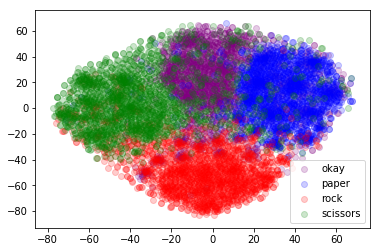

In [13]:
x = ica_m_tsne_X[:,0]
y = ica_m_tsne_X[:,1]

cdict = {'rock': 'red', 'paper': 'blue', 'scissors': 'green', 'okay': 'purple'}

fig, ax = plt.subplots()
for g in np.unique(y_train_m):
    ix = np.where(y_train_m == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = g, alpha=0.2)
ax.legend()
plt.show()

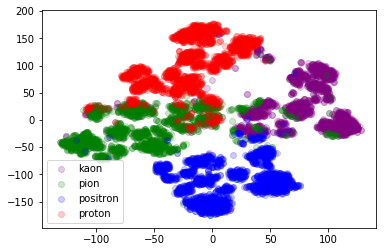

In [253]:
#X_tsne_p_set2[3]

x = X_tsne_p_set2[2][:,0]
y = X_tsne_p_set2[2][:,1]

cdict = {'proton': 'red', 'positron': 'blue', 'pion': 'green', 'kaon': 'purple'}

fig, ax = plt.subplots()
for g in np.unique(y_train_p):
    ix = np.where(y_train_p == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = g, alpha=0.2)
ax.legend()
plt.show()

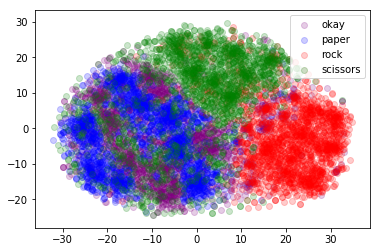

In [260]:
#X_tsne_p_set2[3]
p = 6
x = X_tsne_m_set2[p][:,0]
y = X_tsne_m_set2[p][:,1]

cdict = {'rock': 'red', 'paper': 'blue', 'scissors': 'green', 'okay': 'purple'}

fig, ax = plt.subplots()
for g in np.unique(y_train_m):
    ix = np.where(y_train_m == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = g, alpha=0.2)
ax.legend()
plt.show()